In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import copy
from sklearn.model_selection import train_test_split

In [3]:
def calculate_cost(features, targets, weights, bias):
    """
    Calculates the cost function for a linear regression model using vectorized operations.

    Parameters:
    features (numpy.ndarray): The input feature matrix of shape (samples_count, features_count), where samples_count is the number of samples and features_count is the number of features.
    targets (numpy.ndarray): The target values of shape (samples_count,).
    weights (numpy.ndarray): The weight vector of shape (features_count,).
    bias (float): The bias term.

    Returns:
    float: The cost function value.
    """
    # Question 1.1 (10 points)
    # Your code here (remove pass)
    pass


In [4]:
def compute_gradients(features_mat, target_vec, weight_vec, bias_val):
    """
    Calculates the gradient of the cost function with respect to the weights and bias using vectorized operations.

    Parameters:
    features_mat (numpy.ndarray): The input features matrix of shape (sample_size, feature_count), where sample_size is the number of samples and feature_count is the number of features.
    target_vec (numpy.ndarray): The target values of shape (sample_size,).
    weight_vec (numpy.ndarray): The weight vector of shape (feature_count,).
    bias_val (float): The bias term.

    Returns:
    gradient_bias (float): The gradient of the cost function with respect to the bias.
    gradient_weights (numpy.ndarray): The gradient of the cost function with respect to the weights.
    """
    # Question 1.2 (10 points)
    # Your code here (remove pass)
    pass


In [5]:
import copy
import math
    
def optimize_via_gradient_descent(input_features, targets, initial_weights, initial_bias, calculate_cost, compute_gradient, learning_rate, iterations):
    """
    Perform optimization using gradient descent to minimize the cost function.

    Parameters:
    - input_features: Input features (numpy array)
    - targets: Target values (numpy array)
    - initial_weights: Starting weights (numpy array)
    - initial_bias: Starting bias (float)
    - calculate_cost: Function to compute the cost (loss) (callable)
    - compute_gradient: Function to determine the gradient of the cost function (callable)
    - learning_rate: Adjustment rate for each step (float)
    - iterations: Total steps for optimization (int)

    Returns:
    - final_weights: Optimized weights (numpy array)
    - final_bias: Optimized bias (float)
    - cost_tracker: Record of cost values across steps (list)
    """
    # Question 1.3 (25 points)
    # Your code here (remove pass)
    pass


In [11]:
def make_prediction(feature_matrix, weights_vector, bias_value):
    """
    Predicts the output for a given input using the linear regression model.

    Parameters:
    feature_matrix (numpy.ndarray): The input data of shape (total_samples, total_features).
    weights_vector (numpy.ndarray): The weight vector of shape (total_features,).
    bias_value (float): The bias term.

    Returns:
    numpy.ndarray: The predicted output of shape (total_samples,).
    """
    # Question 1.4 (5 points)
    # Your code here (remove pass)
    pass


The following code performs the following steps:
1. Reads the diamonds dataset from a CSV file.
2. Converts ordinal variables (cut, color, clarity) into numerical formats.
3. Performs feature scaling on selected features.
4. Prepares the input features (X) and target variable (y) for gradient descent.
5. Splits the dataset into training and testing sets.
6. Initializes the parameters for gradient descent.
7. Runs gradient descent optimization using the defined functions.
8. Displays the optimized parameters and the final cost value.

In [7]:


# 1. Reads the diamonds dataset from a CSV file.
diamonds_df = pd.read_csv('diamonds.csv')


# 2. Converts ordinal variables (cut, color, clarity) into numerical formats.
cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_mapping = {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}
clarity_mapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

diamonds_df['cut'] = diamonds_df['cut'].map(cut_mapping).astype(float)
diamonds_df['color'] = diamonds_df['color'].map(color_mapping).astype(float)
diamonds_df['clarity'] = diamonds_df['clarity'].map(clarity_mapping).astype(float)


# 3. Performs feature scaling on selected features (excluding 'price' which is the target variable).
features_to_scale = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
for feature in features_to_scale:
    mean_value = diamonds_df[feature].mean()
    std_value = diamonds_df[feature].std()
    diamonds_df[feature] = (diamonds_df[feature] - mean_value) / std_value


# 4. Prepares the input features (X) and target variable (y) for gradient descent.
X = diamonds_df.drop('price', axis=1).values # Convert dataframe to ndarray for computations
y = diamonds_df['price'].values

# 5. Splits the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 6. Initializes the parameters for gradient descent.
w_initial = np.zeros(X_train.shape[1]) # Initialize w with zeros (n features)
b_initial = 0.0 # Initialize bias with zero
alpha = 0.01 # Learning rate
num_iters = 1000 # Number of iterations to run gradient descent

# 7. Runs gradient descent optimization using the defined functions.
w_optimized, b_optimized, J_history_optimized = optimize_via_gradient_descent(
    X_train, y_train, w_initial, b_initial, 
    calculate_cost, compute_gradients, 
    alpha, num_iters
)

# 8. Displays the optimized parameters and the final cost value.
(w_optimized, b_optimized, J_history_optimized[-1])

Iteration    0: Cost 15049280.53   
Iteration  100: Cost 2341584.04   
Iteration  200: Cost 1282666.72   
Iteration  300: Cost 1101719.58   
Iteration  400: Cost 1049990.15   
Iteration  500: Cost 1020359.40   
Iteration  600: Cost 996370.64   
Iteration  700: Cost 975135.99   
Iteration  800: Cost 955969.02   
Iteration  900: Cost 938588.08   


(array([2353.82563576,  146.8375828 ,  478.43484714,  869.51294588,
         -14.90938164,  -28.71370933,  852.22488675,  456.55258519,
         445.35701631]),
 3928.833241418041,
 922955.0837199966)

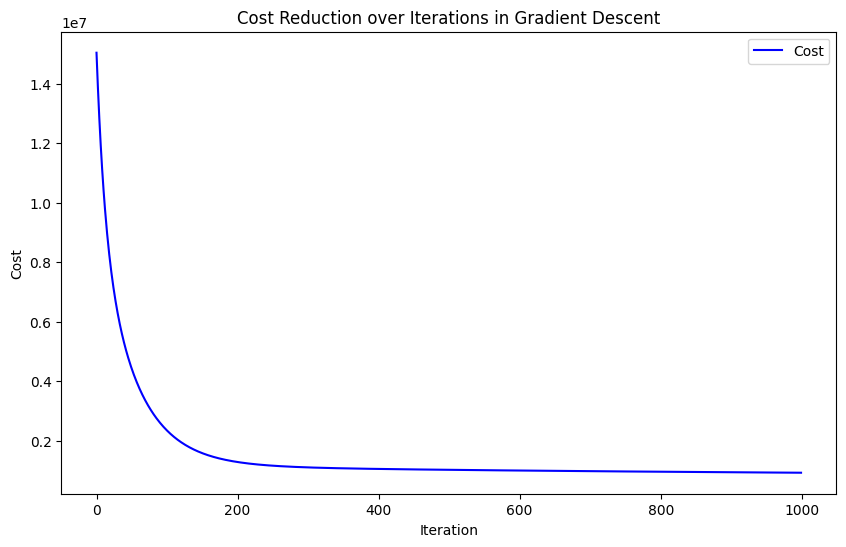

In [8]:
# Plotting the cost (J_history) over iterations
plt.figure(figsize=(10, 6))
plt.plot(J_history_optimized, '-b', label='Cost')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Reduction over Iterations in Gradient Descent')
plt.legend()
plt.show()


In [12]:
# Making predictions on the test set
y_pred = make_prediction(X_test, w_optimized, b_optimized)

# Calculating the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) on the test set
mse_test = np.mean((y_pred - y_test) ** 2)
rmse_test = np.sqrt(mse_test)

# Displaying the MSE and RMSE
print(f'Mean Squared Error (MSE) on Test Set: {mse_test:.2f}')
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse_test:.2f}')


Mean Squared Error (MSE) on Test Set: 1802319.75
Root Mean Squared Error (RMSE) on Test Set: 1342.51


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Training the LinearRegression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Calculating MSE and RMSE for the predictions
mse_test_lr = mean_squared_error(y_test, y_pred_lr)
rmse_test_lr = np.sqrt(mse_test_lr)

# Displaying the MSE and RMSE
print(f'Mean Squared Error (MSE) on Test Set: {mse_test_lr:.2f}')
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse_test_lr:.2f}')


Mean Squared Error (MSE) on Test Set: 1435761.42
Root Mean Squared Error (RMSE) on Test Set: 1198.23
